In [1]:
import quandl
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
mydata=quandl.get("NSE/PFC")#,start_date="2005-12-01",end_date="2005-12-05")#toDo:NSE/SBIN

In [3]:
print(len(mydata))
mydata.tail()

2692


Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2017-12-28  121.90  121.90  119.25  119.75  119.85             5958794.0   
2017-12-29  120.40  122.50  120.10  121.50  121.75             4736779.0   
2018-01-01  121.40  125.50  121.30  124.00  123.80             6640773.0   
2018-01-02  124.95  125.70  122.25  123.40  123.65             5576051.0   
2018-01-03  124.50  124.75  123.05  123.85  123.75             3126273.0   

            Turnover (Lacs)  
Date                         
2017-12-28          7171.80  
2017-12-29          5762.32  
2018-01-01          8232.74  
2018-01-02          6916.36  
2018-01-03          3872.41

# Get Data from Quandl

In [4]:
def get_data(symbol, start_date, end_date):
    data=quandl.get(symbol, start_date = start_date, end_date = end_date)
    return data

# Feature Generation

In [5]:
def generate_features(df):
    """
    Input Dataframe Columns : Open, Close, High, Low, Volume, Adjusted Close
    Output Dataframe Columns : Same columns as Input and new features
    """
    df_new=pd.DataFrame()
    df_new['open']=df['Open']
    #print(df['Open'].head())
    df_new['open_1']=df['Open'].shift(1)
    
    df_new['close_1']=df['Close'].shift(1)
    #print(df['Close'].head())
    df_new['high_1']=df['High'].shift(1)
    df_new['low_1']=df['Low'].shift(1)
    df_new['volume_1']=df['Total Trade Quantity'].shift(1)
    
    df_new['avg_price_5']=pd.rolling_mean(df['Close'],window=5).shift(1)
    df_new['avg_price_30']=pd.rolling_mean(df['Close'],window=21).shift(1)
    df_new['avg_price_365']=pd.rolling_mean(df['Close'],window=252).shift(1)
    
    df_new['ratio_avg_price_5_30']=df_new['avg_price_5']/df_new['avg_price_30']
    df_new['ratio_avg_price_5_365']=df_new['avg_price_5']/df_new['avg_price_365']
    df_new['ratio_avg_price_30_365']=df_new['avg_price_30']/df_new['avg_price_365']
    
    df_new['avg_volume_5']=pd.rolling_mean(df['Total Trade Quantity'],window=5).shift(1)
    df_new['avg_volume_30']=pd.rolling_mean(df['Total Trade Quantity'],window=21).shift(1)
    df_new['avg_volume_365']=pd.rolling_mean(df['Total Trade Quantity'],window=252).shift(1)
    
    df_new['ratio_avg_volume_5_30']=df_new['avg_volume_5']/df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365']=df_new['avg_volume_5']/df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365']=df_new['avg_volume_30']/df_new['avg_volume_365']
    
    df_new['std_price_5']=pd.rolling_std(df['Close'],window=5).shift(1)
    df_new['std_price_30']=pd.rolling_std(df['Close'],window=21).shift(1)
    df_new['std_price_365']=pd.rolling_std(df['Close'],window=252).shift(1)
    
    df_new['ratio_std_price_5_30']=df_new['std_price_5']/df_new['std_price_30']
    df_new['ratio_std_price_5_365']=df_new['std_price_5']/df_new['std_price_365']
    df_new['ratio_std_price_30_365']=df_new['std_price_30']/df_new['std_price_365']
    
    df_new['std_volume_5'] = pd.rolling_std(df['Total Trade Quantity'],window=5).shift(1)
    df_new['std_volume_30'] = pd.rolling_std(df['Total Trade Quantity'],window=21).shift(1)
    df_new['std_volume_365'] = pd.rolling_std(df['Total Trade Quantity'],window=252).shift(1)
    
    df_new['ratio_std_Volume_5_30'] = df_new['std_volume_5']/df_new['std_volume_30']
    df_new['ratio_std_Volume_5_365'] = df_new['std_volume_5']/df_new['std_volume_365']
    df_new['ratio_std_Volume_30_365'] = df_new['std_volume_30']/df_new['std_volume_365']
    
    df_new['return_1'] = ((df['Close']-df['Close'].shift(1))/df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close']-df['Close'].shift(5))/df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close']-df['Close'].shift(21))/df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close']-df['Close'].shift(252))/df['Close'].shift(252)).shift(1)
    
    df_new['moving_avg_5'] = pd.rolling_mean(df_new['return_1'], window=5)
    df_new['moving_avg_30'] = pd.rolling_mean(df_new['return_1'], window=21)
    df_new['moving_avg_365'] = pd.rolling_mean(df_new['return_1'], window=252)
    
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    
    return df_new
    
    
    

In [6]:
result=generate_features(mydata)

In [7]:
result.head()

open  open_1  close_1  high_1   low_1   volume_1  avg_price_5  \
Date                                                                          
2008-02-25  188.00   191.5   185.00  193.00  184.20   721729.0       190.62   
2008-02-26  192.50   188.0   191.35  192.00  182.05   459217.0       191.32   
2008-02-27  193.50   192.5   190.95  194.00  188.00   422143.0       190.69   
2008-02-28  191.00   193.5   191.30  197.75  187.60   829135.0       190.32   
2008-02-29  180.75   191.0   180.75  192.00  176.75  2720964.0       187.87   

            avg_price_30  avg_price_365  ratio_avg_price_5_30   ...    \
Date                                                            ...     
2008-02-25    186.216667     183.499802              1.023646   ...     
2008-02-26    186.078571     183.801587              1.028168   ...     
2008-02-27    185.880952     184.093452              1.025872   ...     
2008-02-28    185.604762     184.411905              1.025405   ...     
2008-02-29    184.892857     184.690476              1.016102   ...     

            ratio_std_Volume_5_365  ratio_std_Volume_30_365  return_1  \
Date                                                                    
2008-02-25                0.317346                 0.270635 -0.041451   
2008-02-26                0.379356                 0.306315  0.034324   
2008-02-27                0.149538                 0.335509 -0.002090   
2008-02-28                0.112792                 0.345099  0.001833   
2008-02-29                0.437778                 0.366976 -0.055149   

            return_5  return_30  return_365  moving_avg_5  moving_avg_30  \
Date                                                                       
2008-02-25  0.003254  -0.001350    0.656964      0.000972       0.001491   
2008-02-26  0.018632  -0.014929    0.659584      0.004095       0.000812   
2008-02-27 -0.016229  -0.021271    0.626491     -0.002978       0.000504   
2008-02-28 -0.009578  -0.029427    0.722647     -0.001632       0.000104   
2008-02-29 -0.063472  -0.076392    0.635007     -0.012507      -0.002184   

            moving_avg_365   close  
Date                                
2008-02-25        0.002744  191.35  
2008-02-26        0.002750  190.95  
2008-02-27        0.002670  191.30  
2008-02-28        0.002892  180.75  
2008-02-29        0.002691  187.45  

[5 rows x 38 columns]

In [8]:
def compute_prediction(X, weights):
    """
    calculate y_hat
    """
    predictions = np.dot(X, weights)
    return predictions

In [9]:
def update_weights(X_train, y_train, weights, learning_rate):
    """
    Update weights
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate/float(m)*weights_delta
    return weights

In [10]:
def compute_cost(X, y, weights):
    """
    COst
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean((predictions-y)**2/2.0)
    return cost

In [11]:
def linear_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """
    Training Linear Regression
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0],1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    
    for iteration in range(max_iter):
        weights = update_weights(X_train, y_train, weights, learning_rate)
        if iteration%100 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights
    

In [12]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0]-1:
        intercept = np.ones((X.shape[0],1))
        X = np.hstack((intercept,X))
    return compute_prediction(X, weights)

In [13]:
import datetime
sd=datetime.datetime(2007, 2, 23, 0, 0)
ed=datetime.datetime(2017, 11, 23, 0, 0)
result_subset=result.ix[sd:ed]


In [14]:
X_col=result.drop(['close'],axis=1).columns
y_col = 'close'
X_train = result_subset[X_col]
y_train = result_subset[y_col]

In [15]:
X_train.shape

(2411, 37)

In [16]:
y_train.shape

(2411,)

In [17]:
sd1=datetime.datetime(2017, 11, 24, 0, 0)
ed1=datetime.datetime(2018, 1, 3, 0, 0)
result_subset1=result.ix[sd1:ed1]

In [18]:
X_test=result_subset1[X_col]
y_test=result_subset1[y_col]

In [19]:
X_test.shape

(28, 37)

In [20]:
y_test.shape

(28,)

In [21]:
y_test.shape

(28,)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [25]:
param_grid = {
    "alpha": [3e-06, 1e-5, 3e-5],
    "eta0": [0.01, 0.03, 0.1],
}

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
lr=linear_model.SGDRegressor(penalty='l2', n_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_absolute_error')

In [27]:
grid_search.fit(X_scaled_train, y_train)

/home/akash/Desktop/Projects/sppr/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/akash/Desktop/Projects/sppr/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/akash/Desktop/Projects/sppr/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/akash/Desktop/Projects/sppr/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarni

/home/akash/Desktop/Projects/sppr/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/akash/Desktop/Projects/sppr/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/akash/Desktop/Projects/sppr/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/akash/Desktop/Projects/sppr/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarni

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=1000, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'eta0': [0.01, 0.03, 0.1], 'alpha': [3e-06, 1e-05, 3e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [28]:
print(grid_search.best_params_)

{'eta0': 0.01, 'alpha': 3e-05}


In [29]:
lr_best=grid_search.best_estimator_

In [30]:
predictions=lr_best.predict(X_scaled_test)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions)))
print('MSE: {0:.3f}'.format(mean_absolute_error(y_test, predictions)))
print('MSE: {0:.3f}'.format(r2_score(y_test, predictions)))


MSE: 2.248
MSE: 1.188
MSE: 0.737


In [32]:
len(predictions)
len(y_test)

28

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

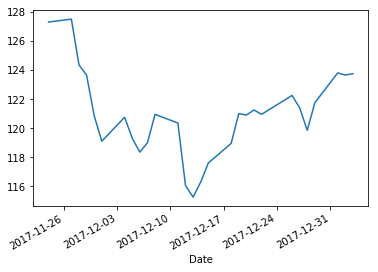

In [58]:
y_test.plot()
output=y_test.copy(deep=True)

In [72]:
output=output.to_frame()


In [73]:
output['prediction']=predictions

In [76]:
output.tail()

close  prediction
Date                          
2017-12-28  119.85  122.097261
2017-12-29  121.75  120.636038
2018-01-01  123.80  122.065192
2018-01-02  123.65  125.150511
2018-01-03  123.75  124.766970